![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Exercises
## Bike store sales

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [4]:
# your code goes here
N = len(sales['Customer_Age'])
mean_Cust_Age = 0

for x in sales['Customer_Age']:
    mean_Cust_Age = mean_Cust_Age + x/N
mean_Cust_Age

35.91921157860884

Why don't you try with `.mean()`

In [5]:
sales['Customer_Age'].mean()

35.91921157861212

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

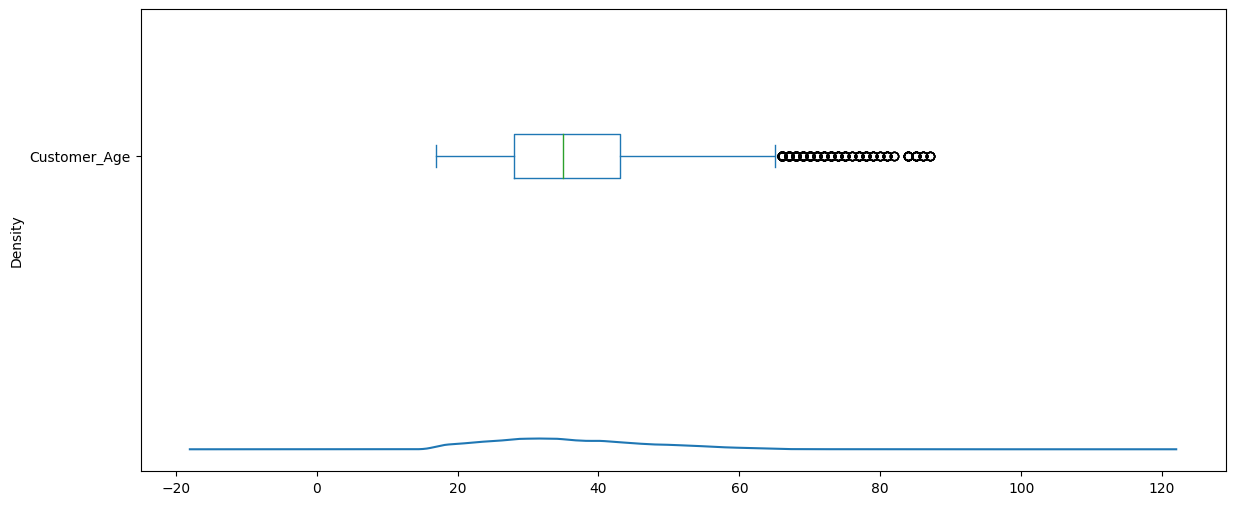

In [6]:
# your code goes here
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))
plt.show()

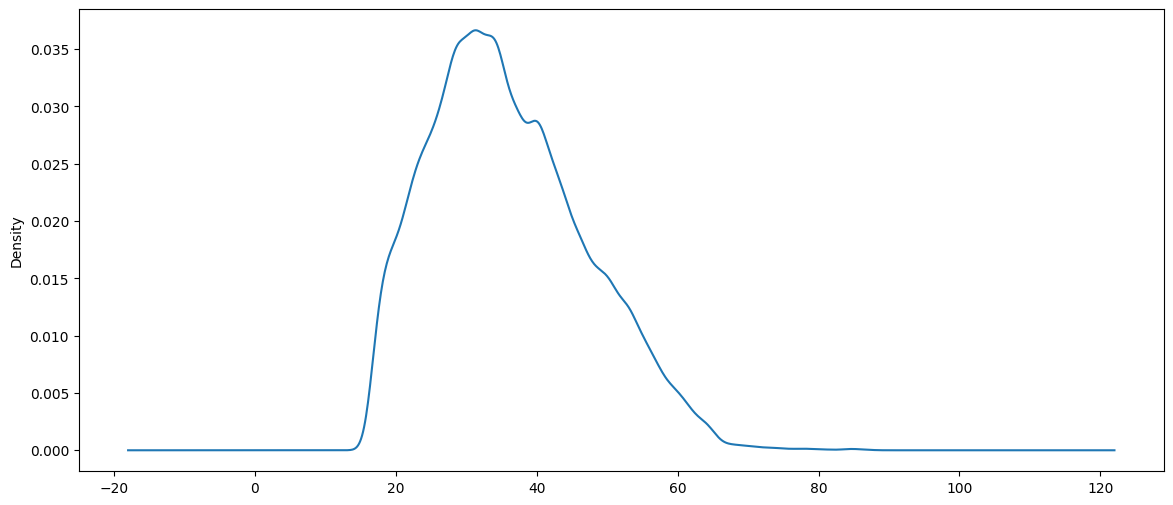

In [7]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))
plt.show()

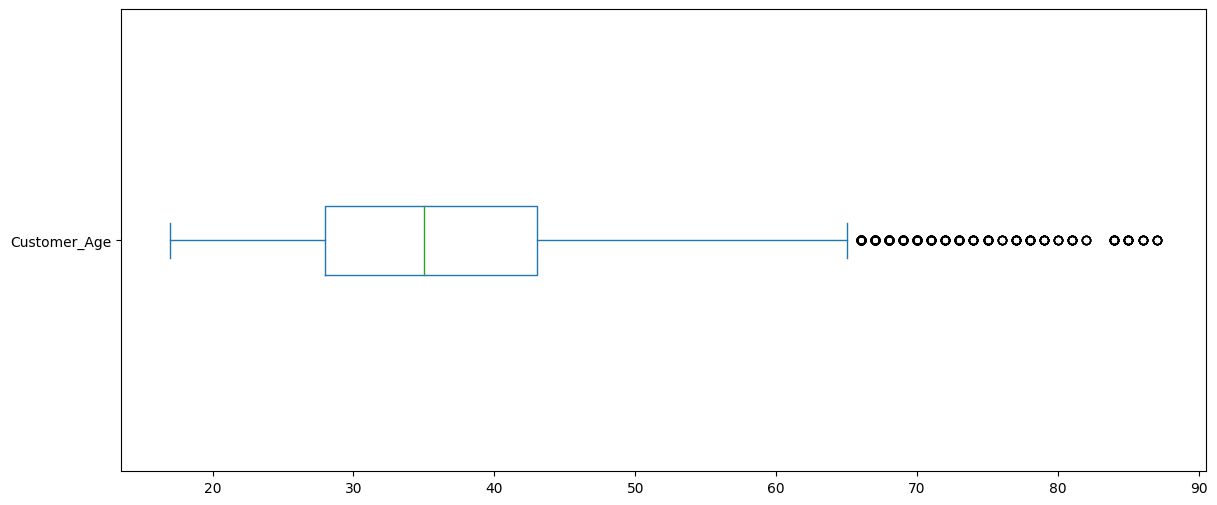

In [8]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [9]:
# your code goes here
N = len(sales['Order_Quantity'])
sum = 0
for x in sales['Order_Quantity']:
    sum = sum + x
    # mean_Ord_Quant = mean_Ord_Quant + x/N # less accurate method
mean_Ord_Quant = sum /N
mean_Ord_Quant

11.901659648253654

In [10]:
sales['Order_Quantity'].mean()

11.901659648253654

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

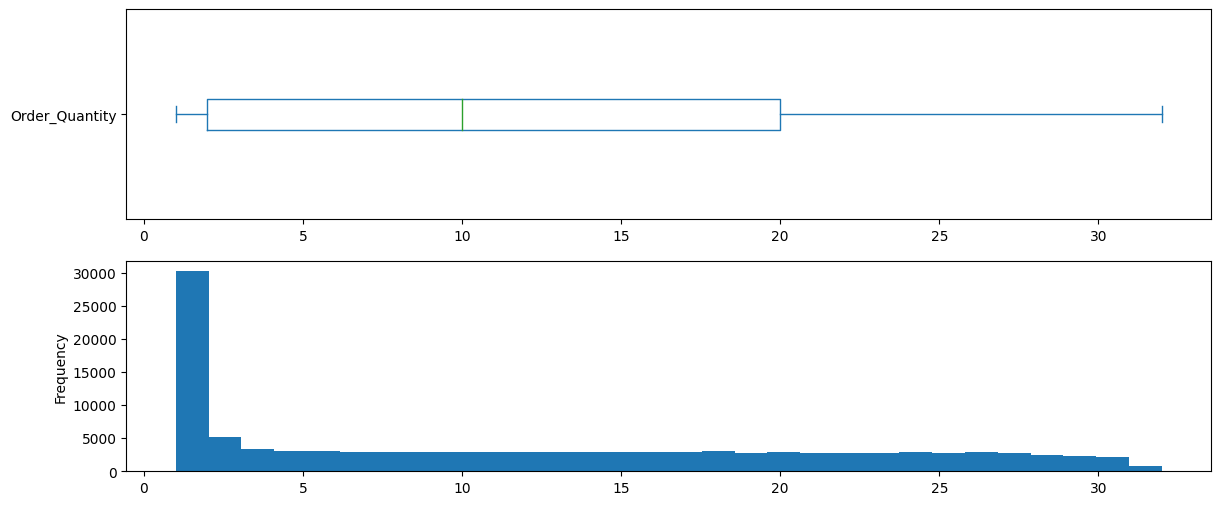

In [11]:
# your code goes here
fig, axarr = plt.subplots(2, 1)
plt.sca(axarr[0])
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))
plt.sca(axarr[1])
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))
plt.show()


<AxesSubplot: ylabel='Frequency'>

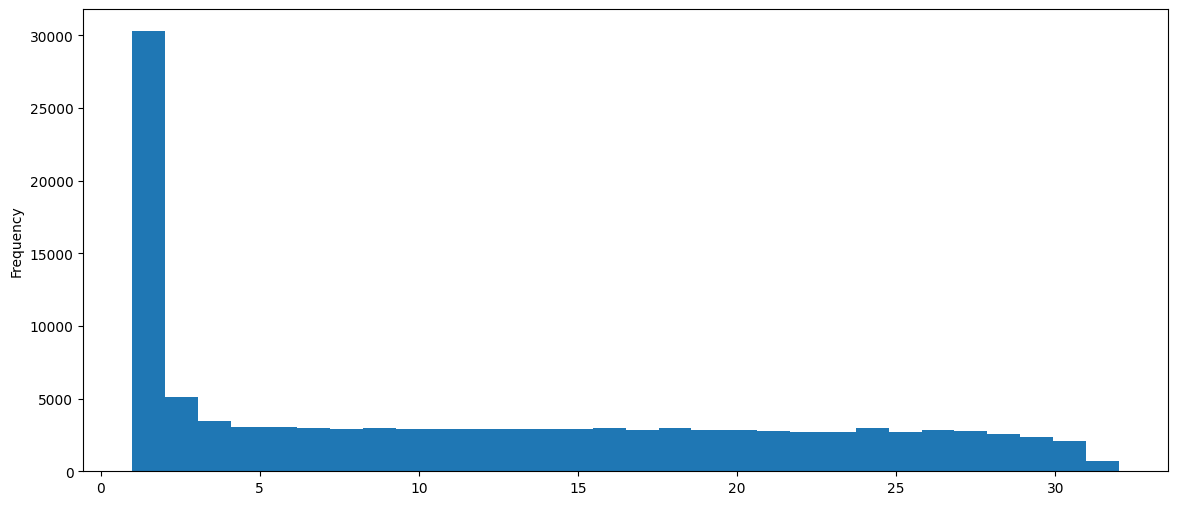

In [12]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

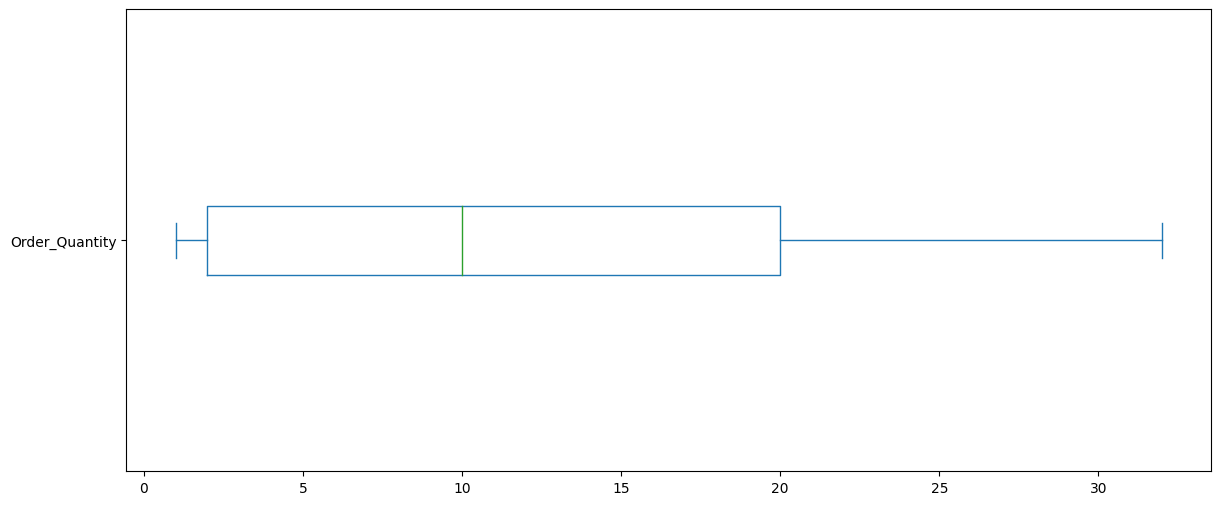

In [13]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [14]:
# your code goes here
years = sales['Year'].copy()
years = list(map(int, years.unique()))
years.sort()
for y in years:
    n = len(sales[sales['Year'] == y]['Year'])
    print(y, n)

2011 2677
2012 2677
2013 24443
2014 29398
2015 24443
2016 29398


In [15]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

Go ahead and show a <b>pie plot</b> with the previous data:

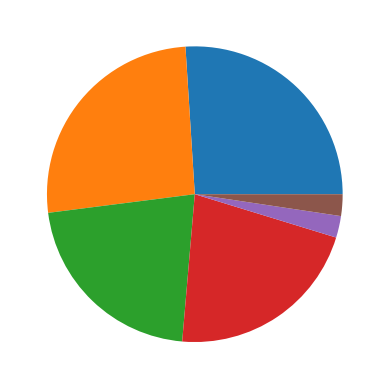

In [16]:
# your code goes here
plt.pie(sales['Year'].value_counts())
plt.show()

<AxesSubplot: ylabel='Year'>

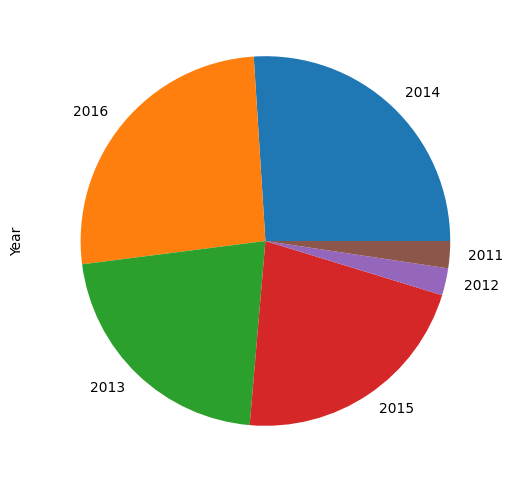

In [17]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per month do we have?

In [18]:
# your code goes here
# ("brute force" approach):
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'September',
          'October', 'November', 'December']
counts = dict.fromkeys(months)
for month in months:
    counts[month] = len(sales.loc[sales['Month'] == month])
counts

{'January': 9284,
 'February': 9022,
 'March': 9674,
 'April': 10182,
 'May': 11128,
 'June': 11234,
 'July': 7462,
 'September': 8166,
 'October': 8750,
 'November': 8734,
 'December': 11200}

In [19]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

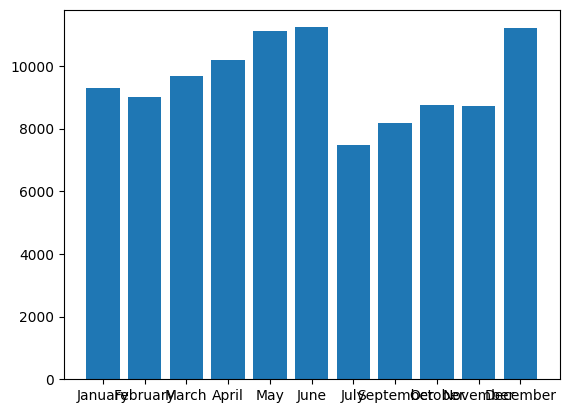

In [20]:
# your code goes here
plt.bar(x=counts.keys(), height=counts.values())
plt.show(fig)

<AxesSubplot: >

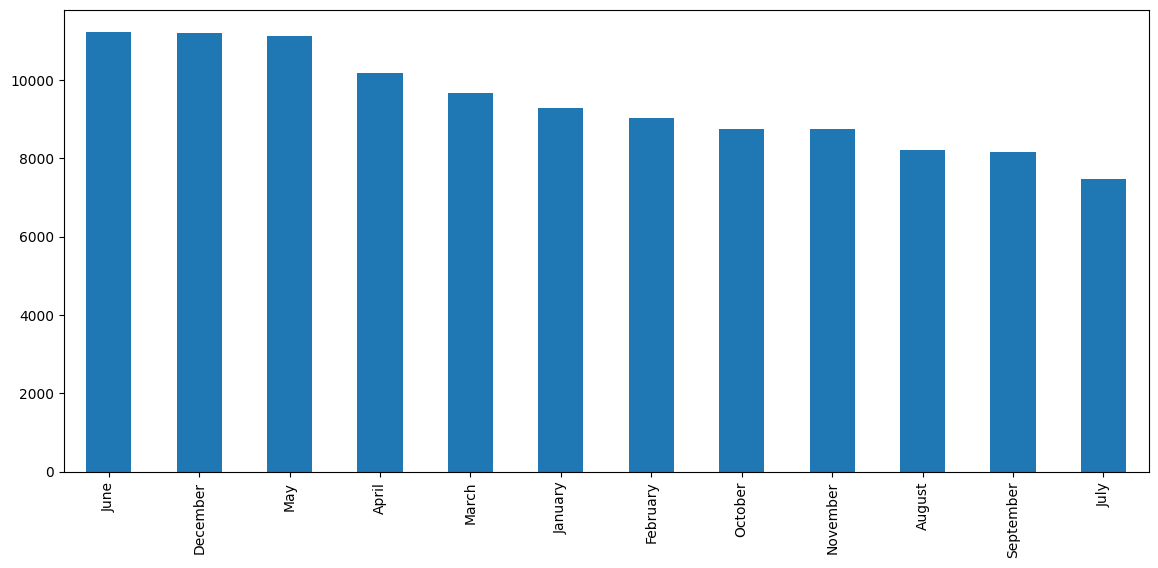

In [21]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [22]:
# your code goes here
# Again, the code is given in the next code cell, so I try a less concise approach
countries = pd.unique(sales['Country'])
most_sales = 0
q = 0
for country in countries:
    q = sales.loc[sales['Country'] == country].shape[0]
    if q > most_sales:
        most_sales = q
most_sales

39206

In [23]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [24]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

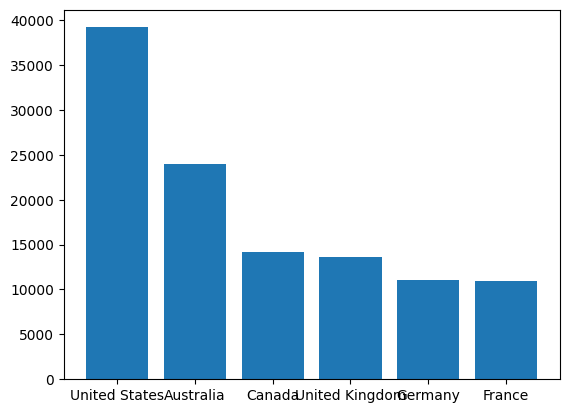

In [72]:
# your code goes here
sales_per_country = dict.fromkeys(countries)
for c in sales_per_country.keys():
    sales_per_country[c] = sales.loc[sales['Country'] == c].shape[0]
# print(sales_per_country)

sorted_sales = dict(sorted(sales_per_country.items(), key=lambda x:x[1], reverse=True))
plt.bar(x=sorted_sales.keys(), height=sorted_sales.values())
plt.show()

<AxesSubplot: >

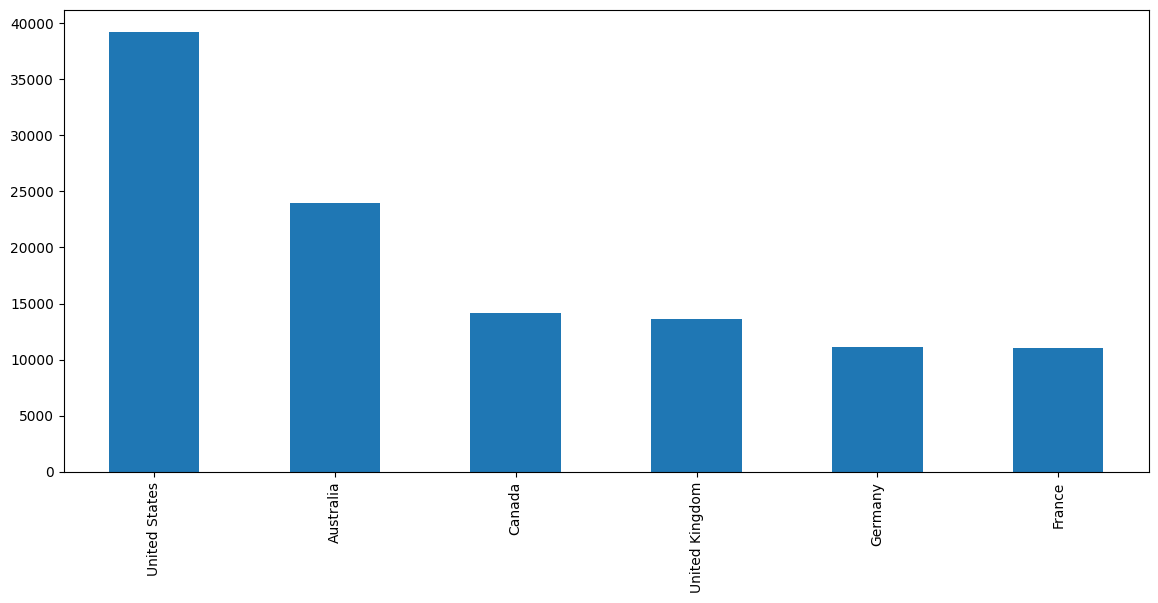

In [30]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [ ]:
# your code goes here


In [ ]:
#sales.loc[:, 'Product'].unique()

sales['Product'].unique()

Create a **bar plot** showing the 10 most sold products (best sellers):

In [ ]:
# your code goes here


In [ ]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
# your code goes here


In [ ]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
# your code goes here


In [ ]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

In [ ]:
# your code goes here


In [ ]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

In [ ]:
# your code goes here


In [ ]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [ ]:
# your code goes here


In [ ]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [ ]:
# your code goes here


In [ ]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

In [ ]:
# your code goes here


In [ ]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [ ]:
# your code goes here


In [ ]:
#sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [ ]:
# your code goes here


In [ ]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [ ]:
# your code goes here


In [ ]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [ ]:
# your code goes here


In [ ]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
france_states.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [ ]:
# your code goes here


In [ ]:
sales['Product_Category'].value_counts()

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [ ]:
# your code goes here


In [ ]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [ ]:
# your code goes here


In [ ]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
bikes.plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [ ]:
# your code goes here


In [ ]:
sales['Customer_Gender'].value_counts()

In [ ]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [ ]:
# your code goes here


In [ ]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [ ]:
# your code goes here


In [ ]:
sales.sort_values(['Revenue'], ascending=False).head(5)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [ ]:
# your code goes here


In [ ]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [ ]:
# your code goes here


In [ ]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [ ]:
# your code goes here


In [ ]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [ ]:
# your code goes here


In [ ]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [ ]:
# your code goes here


In [ ]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

Show a grouped <b>box plot</b> per month with the profit values.

In [ ]:
# your code goes here


In [ ]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
# your code goes here


In [ ]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)